<a href="https://colab.research.google.com/github/asit1223/CODSOFT/blob/main/movie_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt
plt.rc('figure',figsize=(10,5))
size_subplot=(10,10)
bin_size=10

In [3]:
df_m = pd.read_csv('IMDb Movies India.csv',encoding='latin-1')

In [ ]:
df_m.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
df_m.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,(1995),NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,(1993),NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
df_m.shape
print('number of rows',df_m.shape[0])
print('number of columns',df_m.shape[1])

number of rows 15509
number of columns 10


In [ ]:
df_m.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df_m.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
df_m.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'year vs movie count'}, xlabel='Year'>

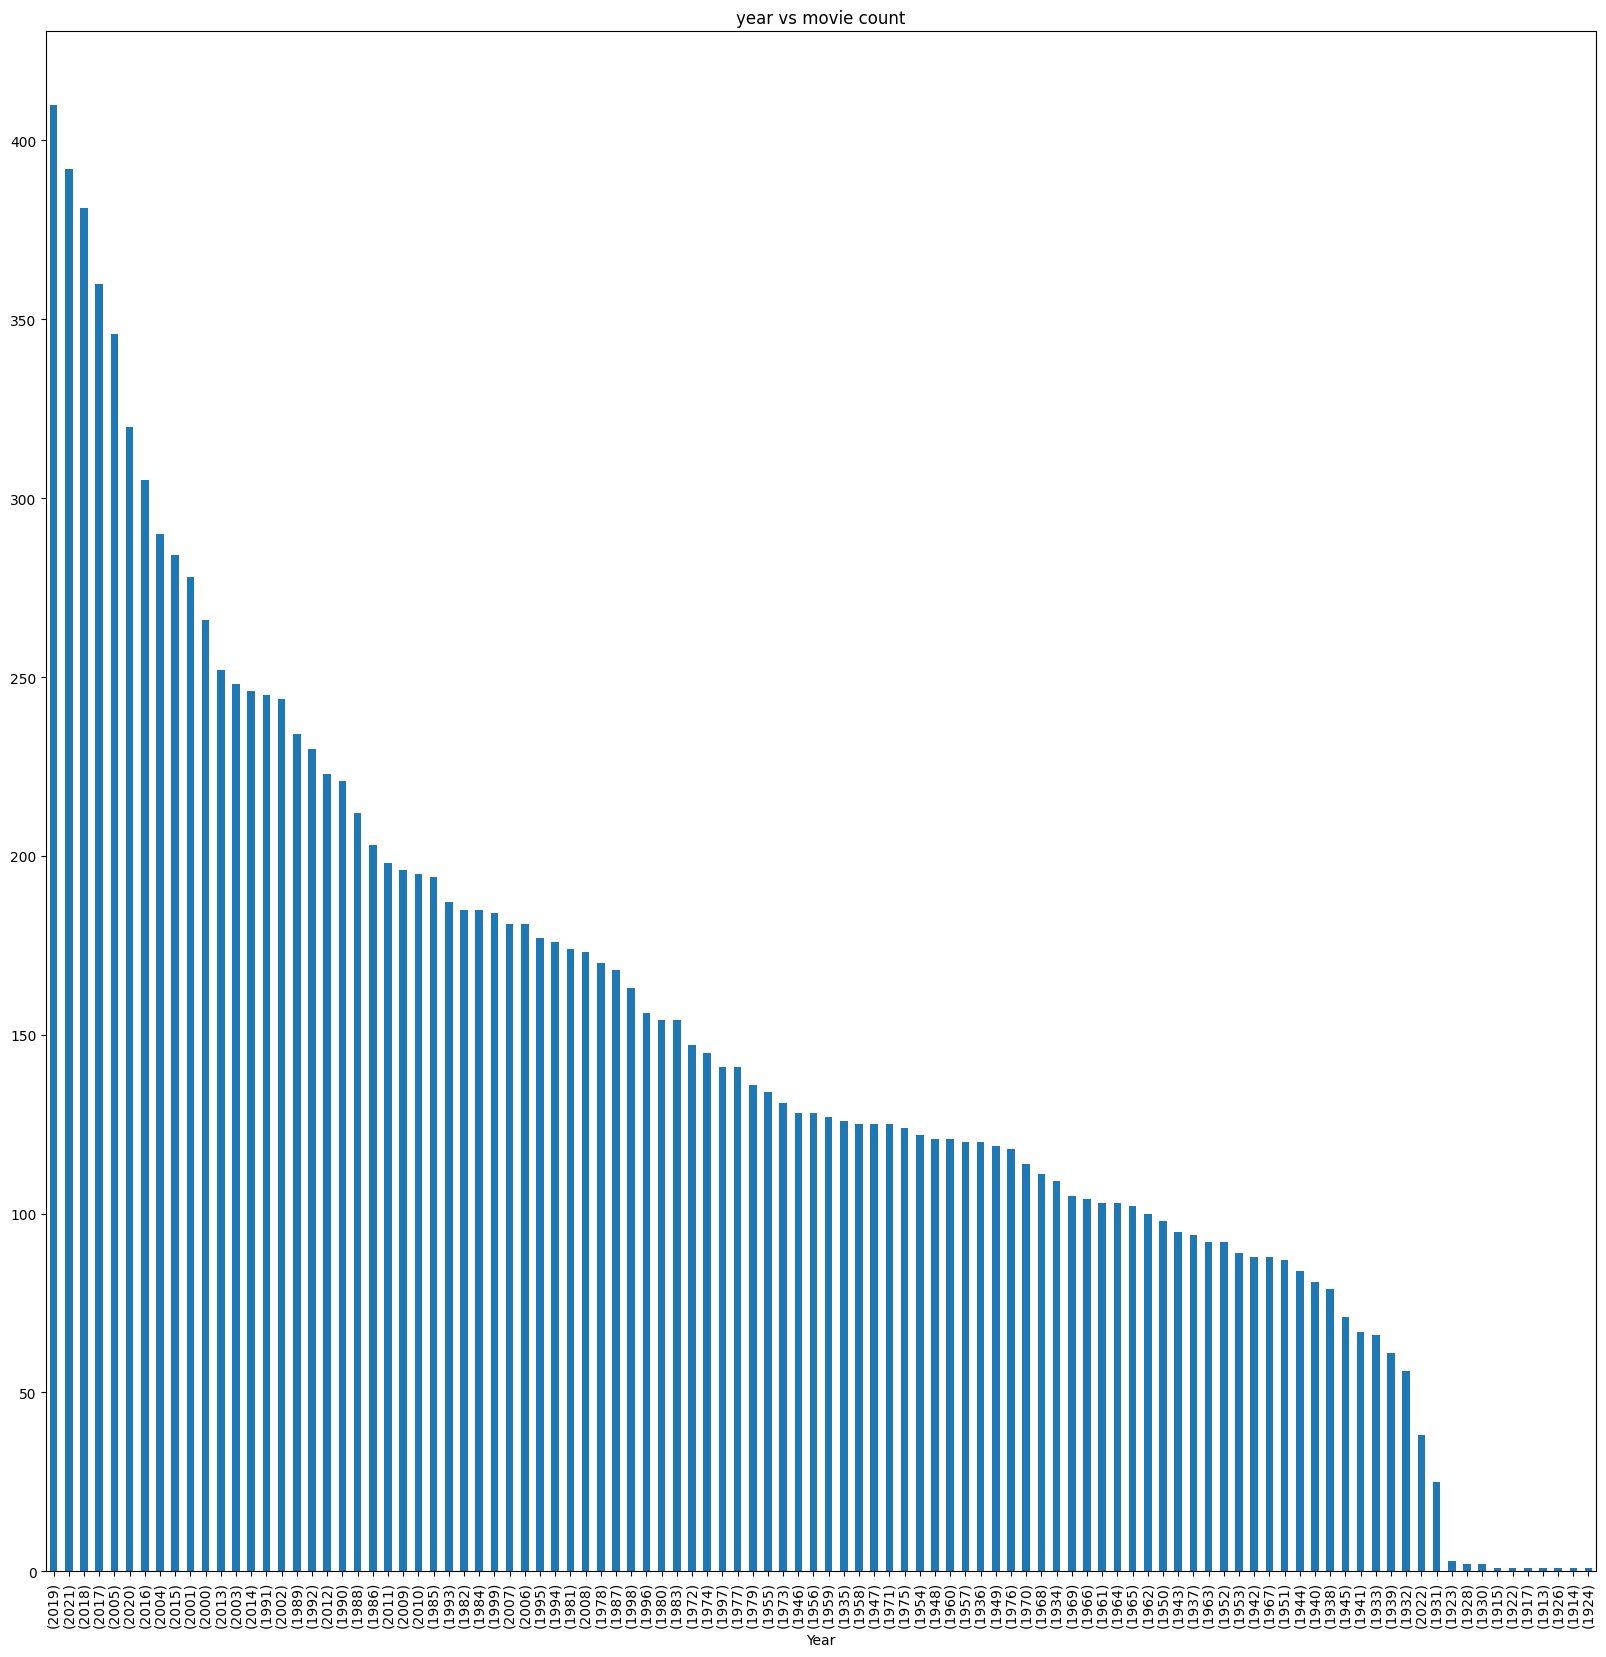

In [ ]:
fig = plt.figure(figsize=(20,20))
fig_dims=(1,1)

plt.subplot2grid(fig_dims,(0,0))
df_m['Year'].value_counts().plot(kind = 'bar',title= 'year vs movie count')



<Axes: title={'center': 'genre vs movie count'}, xlabel='Genre'>

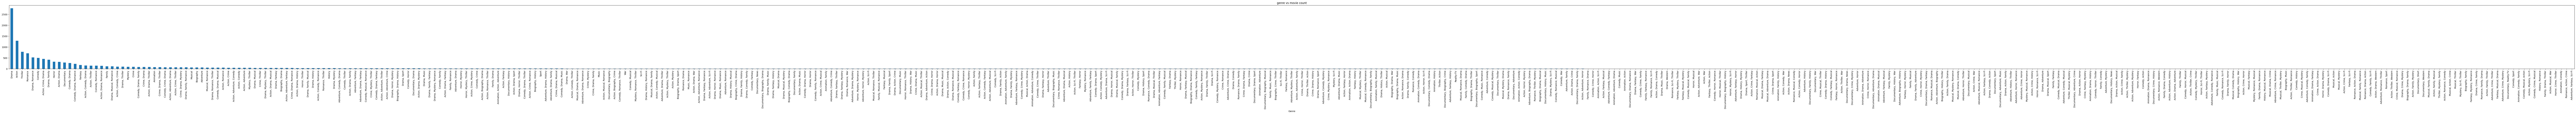

In [ ]:
fig = plt.figure(figsize=(200,5))
fig_dims=(1,1)

plt.subplot2grid(fig_dims,(0,0))
df_m['Genre'].value_counts().plot(kind = 'bar',title= 'genre vs movie count')

#**Check missing values in the dataset**

In [ ]:
print("any missing value",df_m.isnull().values.any())


any missing value True


In [ ]:
df_m.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


<Axes: >

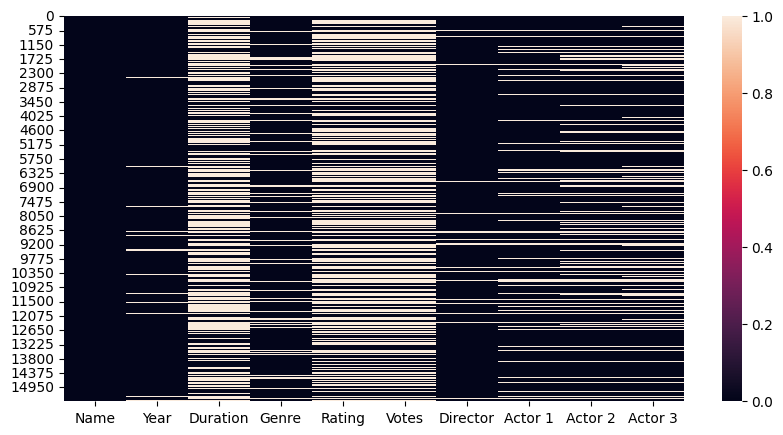

In [ ]:
sns.heatmap(df_m.isnull())

In [ ]:
per_missing = df_m.isnull().sum() * 100 / len(df_m)
per_missing

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [ ]:
df_m.dropna(axis=0)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
fup_data=df_m.duplicated().any()
print("are there any duplicated data ?",dup_data)

are there any duplicated data ? True


In [ ]:
data=df_m.drop_duplicates()
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_m.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df_m['Duration'] = pd.to_numeric(df_m['Duration'], errors='coerce')

In [ ]:
df_m[df_m['Rating']<=7.0]['Name']

1        #Gadhvi (He thought he was Gandhi)
3                                   #Yaaram
5                      ...Aur Pyaar Ho Gaya
8                        ?: A Question Mark
9                                  @Andheri
                        ...                
15501                       Zulm Ki Hukumat
15503                       Zulm Ki Zanjeer
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15508                          Zulm-O-Sitam
Name: Name, Length: 6372, dtype: object

In [33]:
df_m['Votes']=pd.to_numeric(df_m['Votes'],errors='coerce')
avg_votes=df_m['Votes'].mean()
avg_votes

120.83949297495418

In [ ]:
 df_m[df_m['Year'] != "NaN"].groupby('Year')['Votes'].mean()


Year
nan    120.839493
Name: Votes, dtype: float64

In [ ]:
df_m['Director'].value_counts().sort_values(ascending=True)

Director
Anu Dhawan          1
Kumud Chaudhary     1
Jose Punnoose       1
Mandeep Chaahal     1
Pradeep Nayyar      1
                   ..
Master Bhagwan     47
Mahesh Bhatt       48
Babubhai Mistry    50
Kanti Shah         57
Jayant Desai       58
Name: count, Length: 5938, dtype: int64

In [ ]:
df_m.groupby('Director')['Rating'].mean()

Director
A B Arjun              NaN
A. Bhimsingh      6.776471
A. Habib               NaN
A. Jagannathan    5.833333
A. Karim               NaN
                    ...   
Zoya Akhtar       6.800000
Zubair Khan       6.900000
Zubeida                NaN
Zul Vellani            NaN
Zunaid Memon      6.400000
Name: Rating, Length: 5938, dtype: float64

<ipython-input-71-6c0e82526957>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director', y='Rating',data=df_m.head(10),palette='husl')


<Axes: xlabel='Director', ylabel='Rating'>

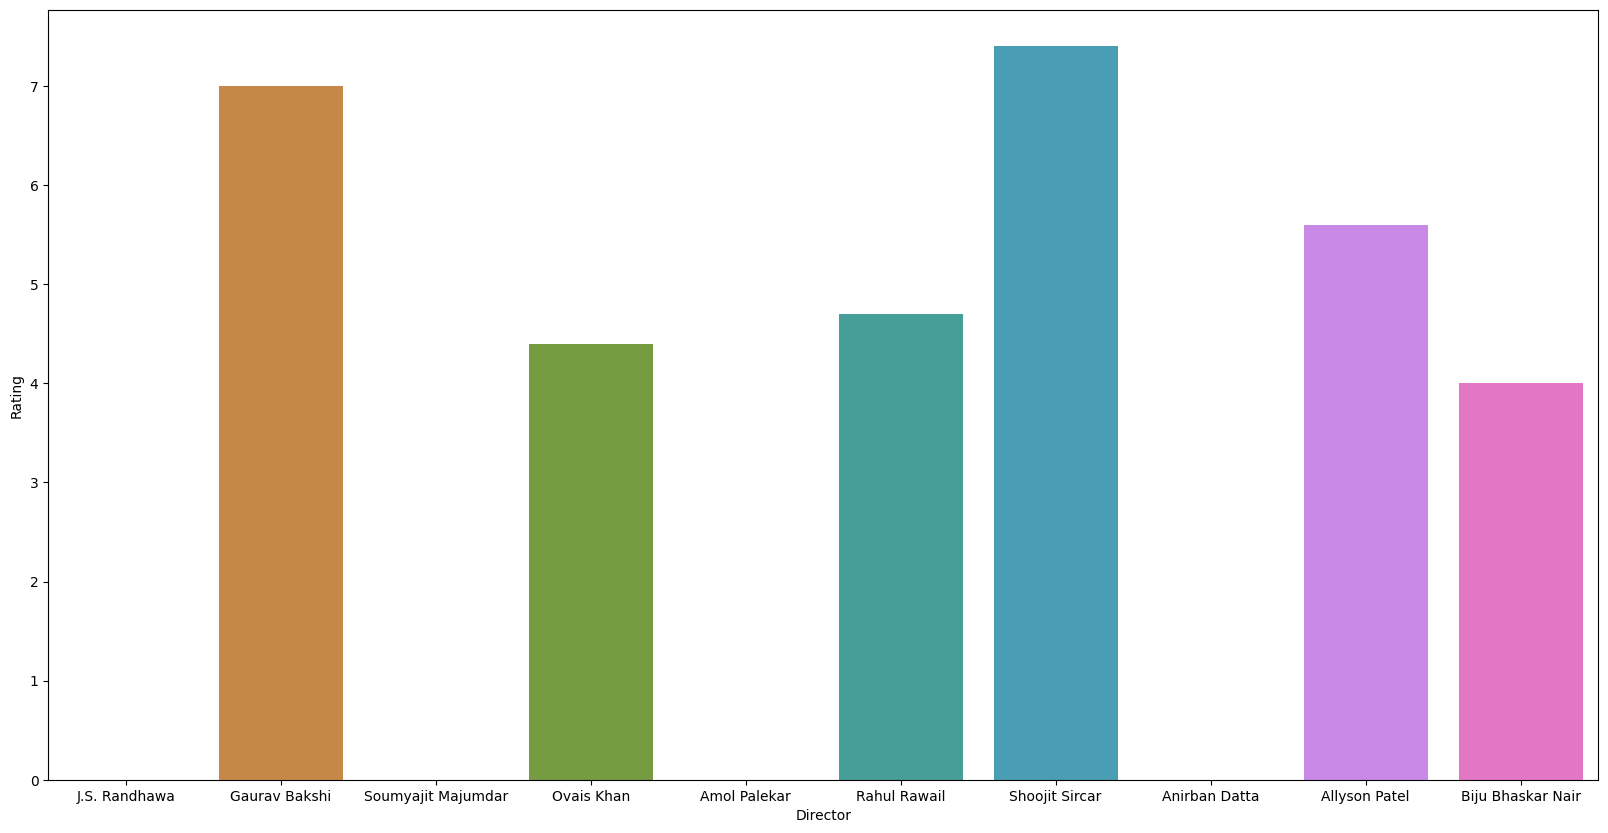

In [ ]:
fig = plt.figure(figsize=(20,10))
fig_dims=(1,1)
sns.barplot(x='Director', y='Rating',data=df_m.head(10),palette='husl')


In [ ]:
df_m.groupby('Director')['Votes'].mean()

Director
A B Arjun               NaN
A. Bhimsingh      82.941176
A. Habib                NaN
A. Jagannathan    74.333333
A. Karim                NaN
                    ...    
Zoya Akhtar             NaN
Zubair Khan       68.500000
Zubeida                 NaN
Zul Vellani             NaN
Zunaid Memon      84.000000
Name: Votes, Length: 5938, dtype: float64

<ipython-input-73-0328dab488c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director', y='Votes',data=df_m.head(10),palette='husl')


<Axes: xlabel='Director', ylabel='Votes'>

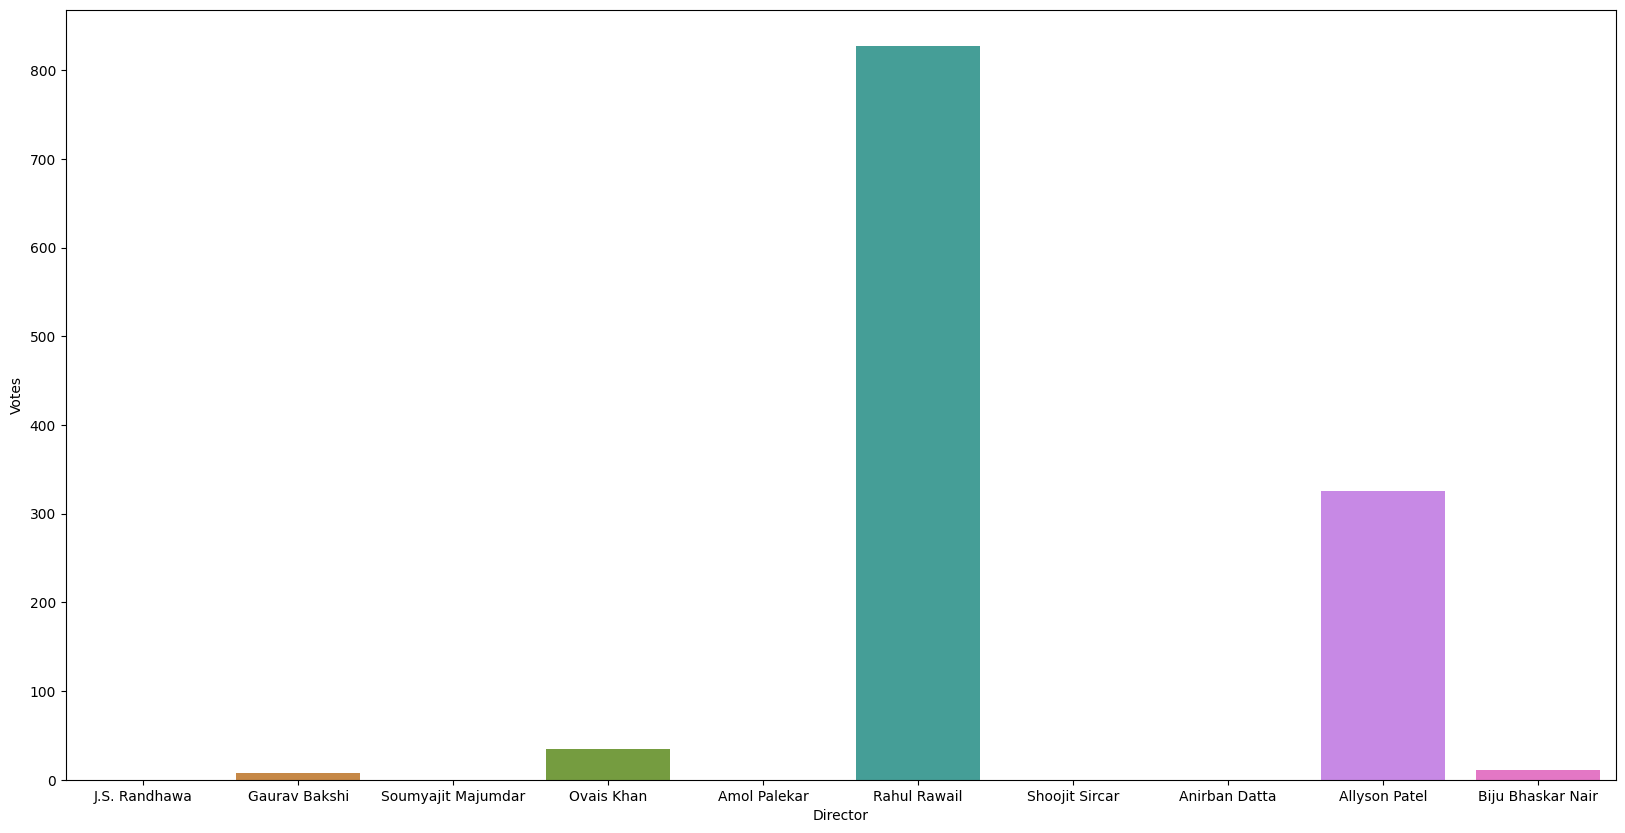

In [ ]:
fig = plt.figure(figsize=(20,10))
fig_dims=(1,1)
sns.barplot(x='Director', y='Votes',data=df_m.head(10),palette='husl')


In [ ]:
df_m.nlargest(10,'Rating')[['Name','Rating']].set_index('Name')

,Rating
Name,
Love Qubool Hai,10.0
Half Songs,9.7
Breed,9.6
Gho Gho Rani,9.4
June,9.4
Ram-Path,9.4
The Reluctant Crime,9.4
Ashok Vatika,9.3
Baikunth,9.3


<ipython-input-84-351f715776d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Rating',data=df_m.nlargest(10,'Rating')[['Name','Rating']].set_index('Name'),palette='husl')


<Axes: xlabel='Name', ylabel='Rating'>

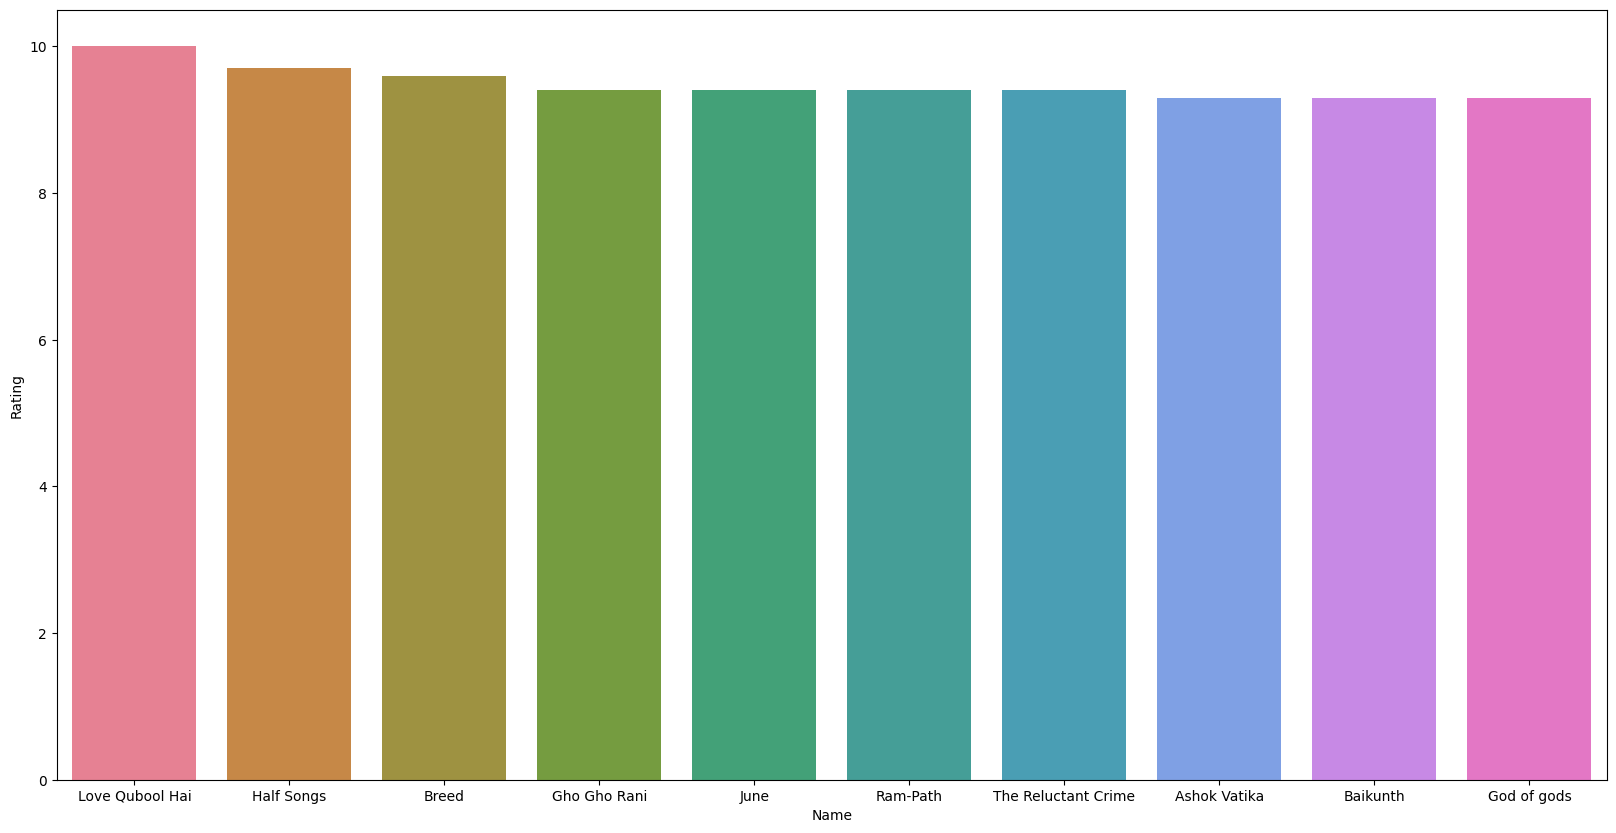

In [ ]:
fig = plt.figure(figsize=(20,10))
fig_dims=(1,1)
sns.barplot(x='Name', y='Rating',data=df_m.nlargest(10,'Rating')[['Name','Rating']].set_index('Name'),palette='husl')



<ipython-input-4-59cd66e330b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Name',data=df_m.nlargest(10,'Rating')[['Name','Rating']].set_index('Name'),palette='husl')


<Axes: xlabel='Rating', ylabel='Name'>

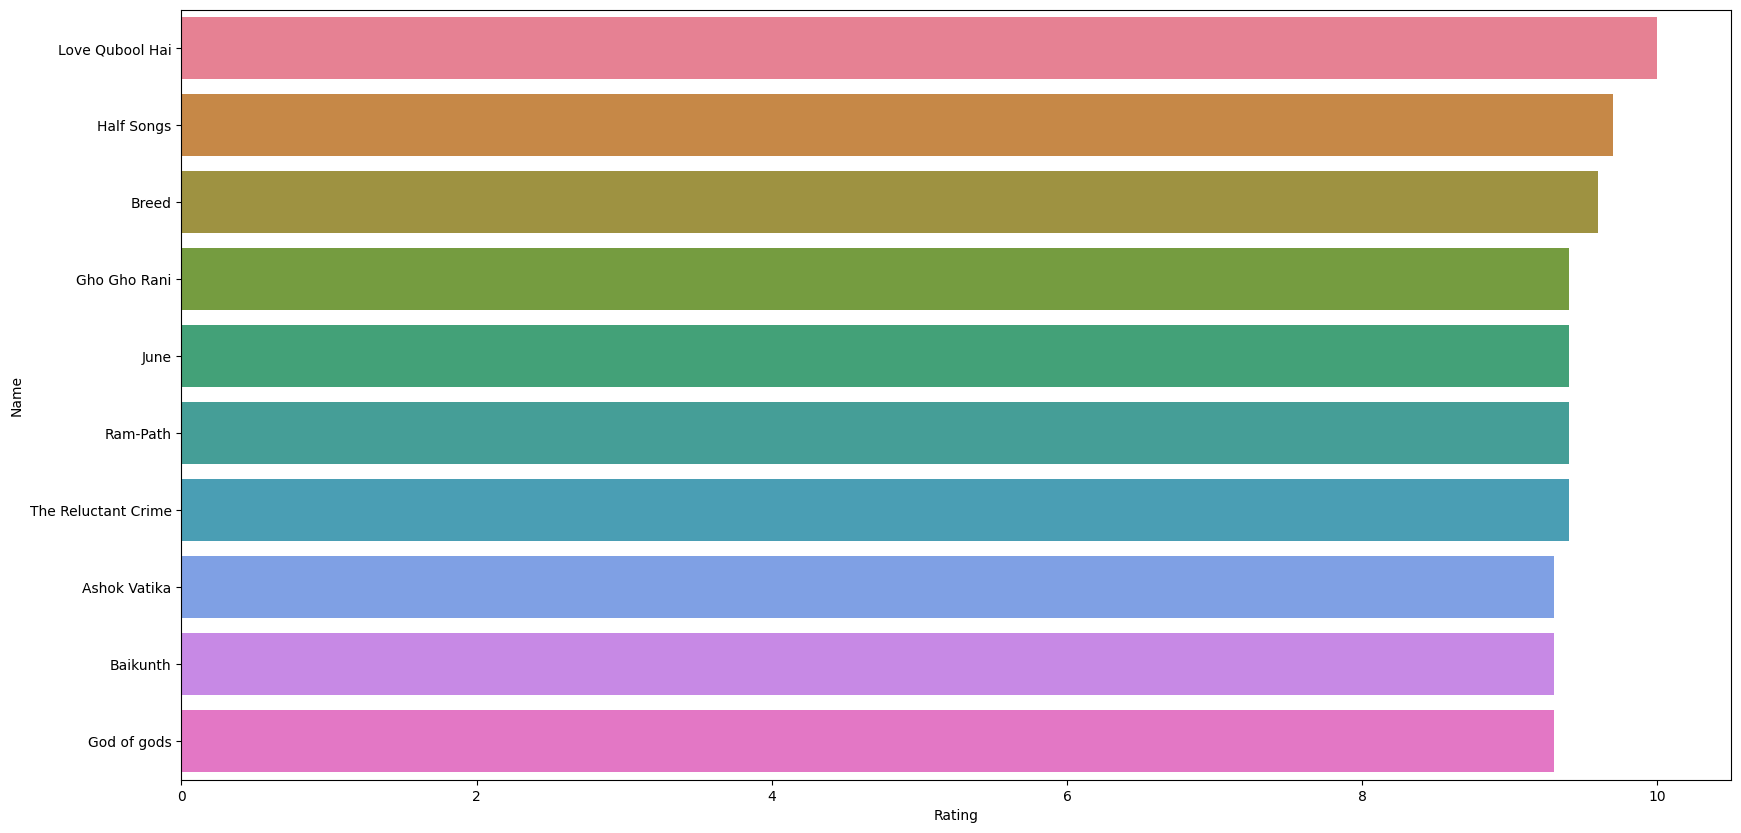

In [4]:
fig = plt.figure(figsize=(20,10))
fig_dims=(1,1)
sns.barplot(x='Rating', y='Name',data=df_m.nlargest(10,'Rating')[['Name','Rating']].set_index('Name'),palette='husl')



In [5]:
df_m['Year'].value_counts()

Year
(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: count, Length: 102, dtype: int64

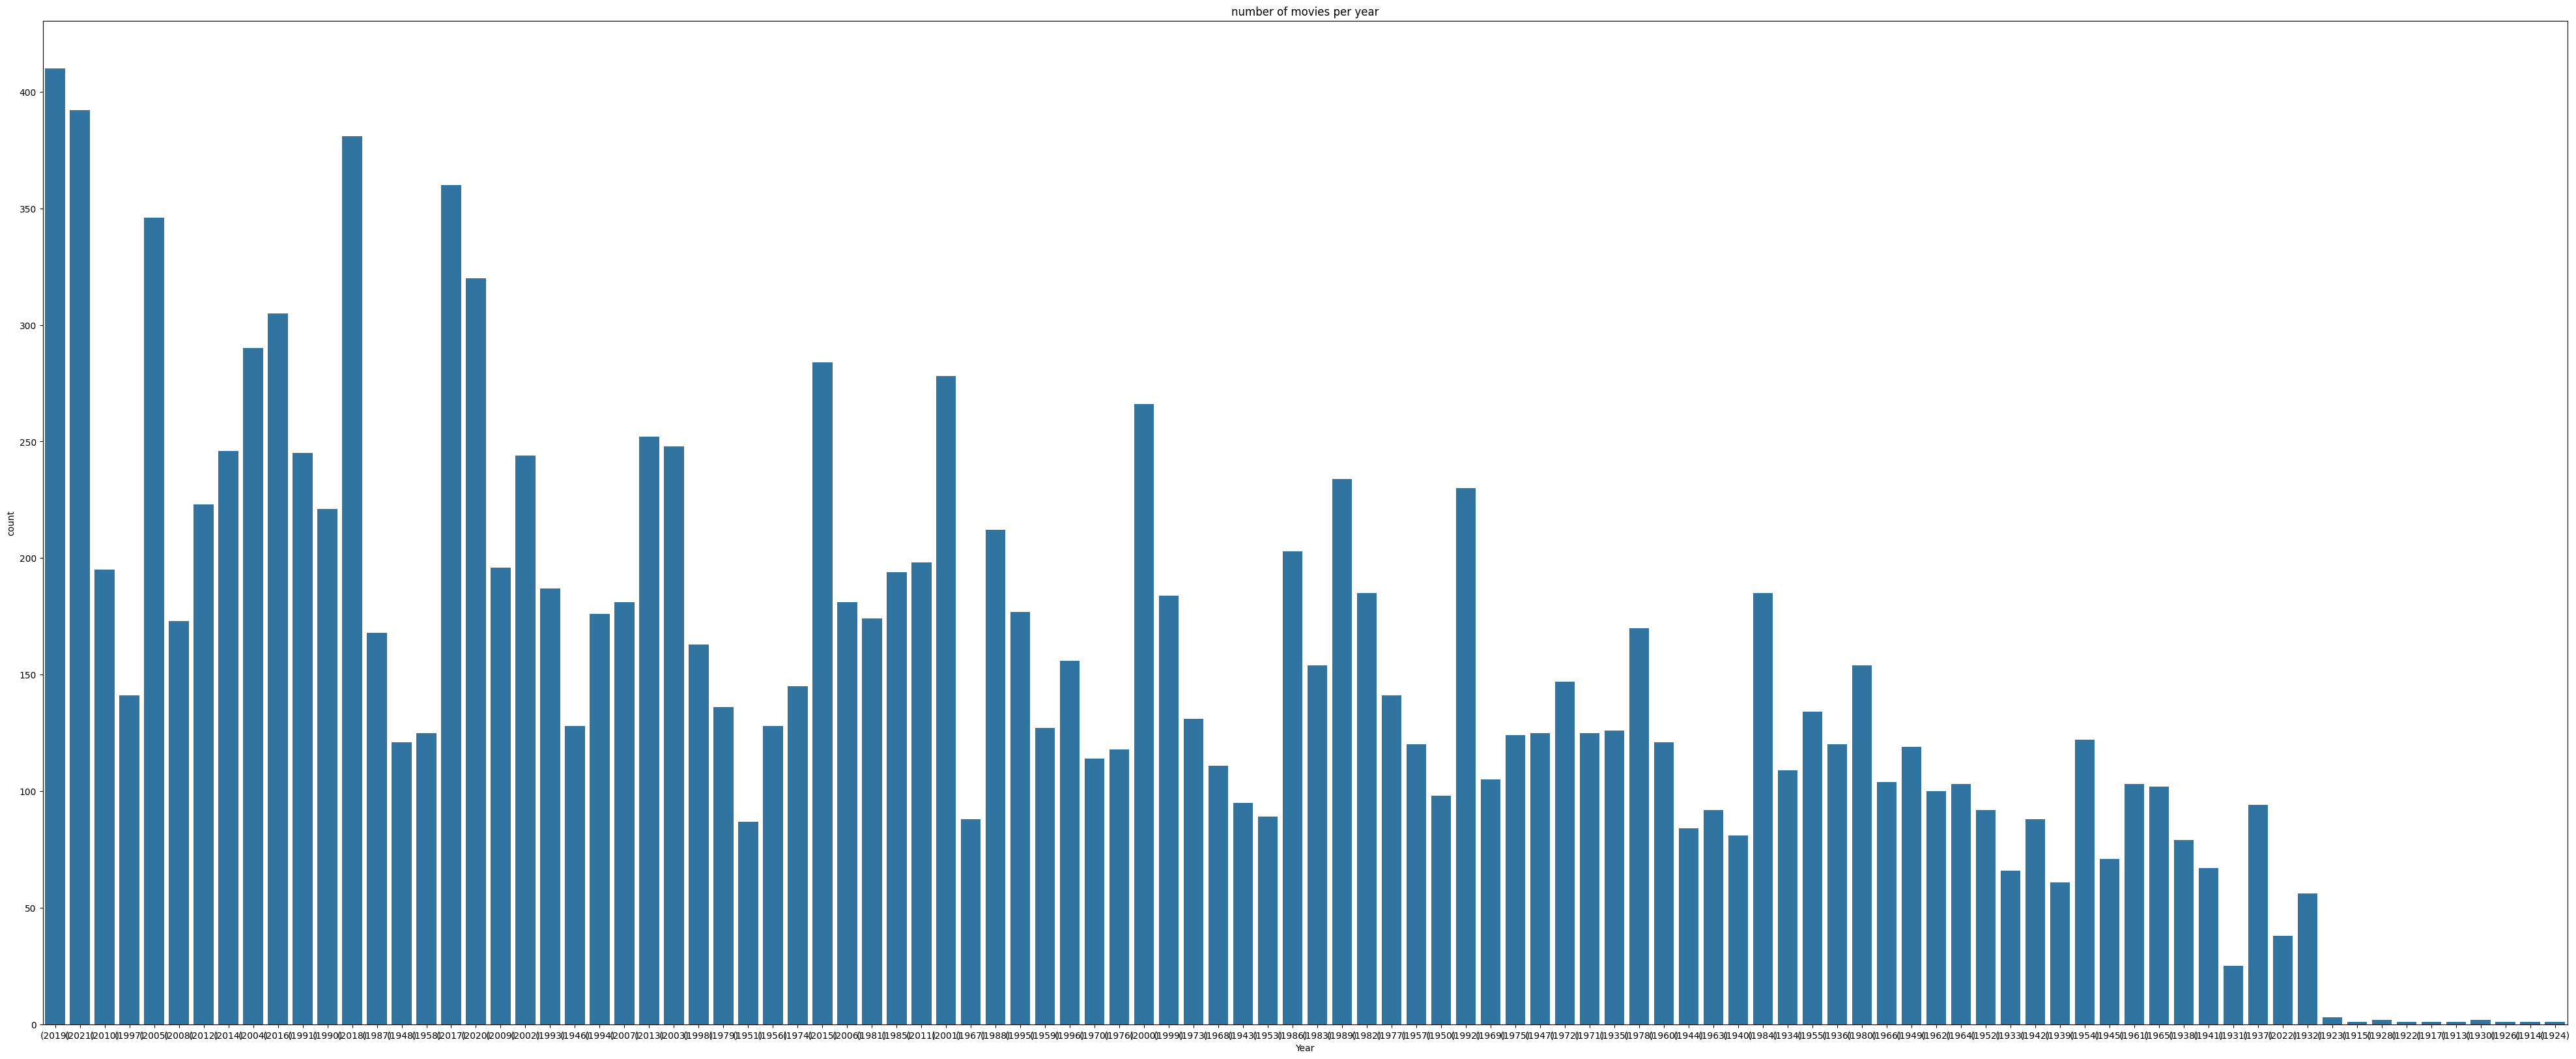

In [11]:
fig = plt.figure(figsize=(50,20))
fig_dims=(1,1)
sns.countplot(x='Year',data=df_m)
plt.title("number of movies per year")
plt.show()


In [23]:
df_m[df_m['Rating'].max()==df_m['Rating']].set_index('Name')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Name,,,,,,,,,
Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [26]:
df_m.nlargest(10,'Rating')[['Name','Rating','Director']].set_index('Name')


,Rating,Director
Name,,
Love Qubool Hai,10.0,Saif Ali Sayeed
Half Songs,9.7,Sriram Raja
Breed,9.6,Bobby Kumar
Gho Gho Rani,9.4,Munni Pankaj
June,9.4,Suhrud Godbole
Ram-Path,9.4,Ashish Dubey
The Reluctant Crime,9.4,Arvind Pratap
Ashok Vatika,9.3,Rahul Mallick
Baikunth,9.3,Vishwa Bhanu


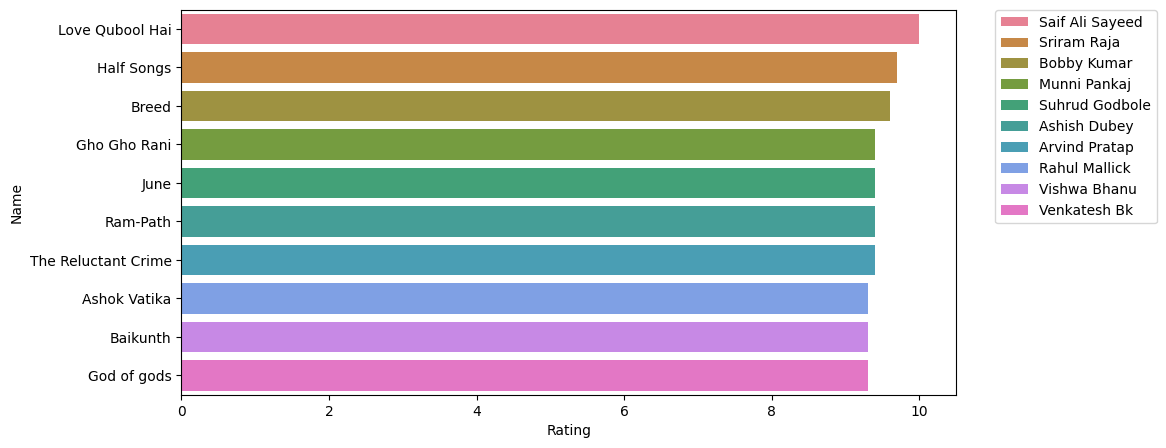

In [31]:
sns.barplot(x='Rating', y='Name',data=df_m.nlargest(10,'Rating')[['Name','Rating','Director']].set_index('Name'),palette='husl',hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

In [34]:
df_m.nlargest(10,'Votes')[['Name','Votes']].set_index('Name')

,Votes
Name,
Satyam Shivam Sundaram: Love Sublime,999.0
Hera Pheri,998.0
Kurukshetra,996.0
Dishkiyaoon,986.0
Ittefaq,985.0
Kadvi Hawa,985.0
Naam,984.0
100 Days,983.0
Bumboo,982.0


<ipython-input-36-2bd19c6004d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Votes', y='Name',data=df_m.nlargest(10,'Votes')[['Name','Votes']].set_index('Name'),palette='husl')


Text(0.5, 1.0, 'Top 10 movies as per Rating')

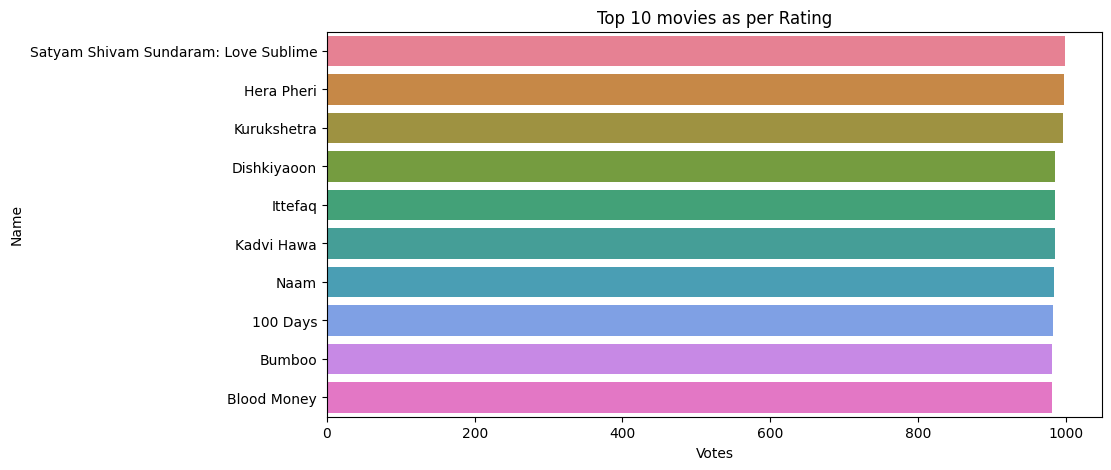

In [36]:
sns.barplot(x='Votes', y='Name',data=df_m.nlargest(10,'Votes')[['Name','Votes']].set_index('Name'),palette='husl')
plt.title("Top 10 movies as per Rating")

In [41]:
df_m.groupby('Year')['Rating'].mean()

Year
(1913)         NaN
(1914)         NaN
(1915)         NaN
(1917)    6.700000
(1922)         NaN
            ...   
(2018)    6.239912
(2019)    6.317671
(2020)    6.282635
(2021)    6.625641
(2022)         NaN
Name: Rating, Length: 102, dtype: float64

<Axes: xlabel='Rating', ylabel='Votes'>

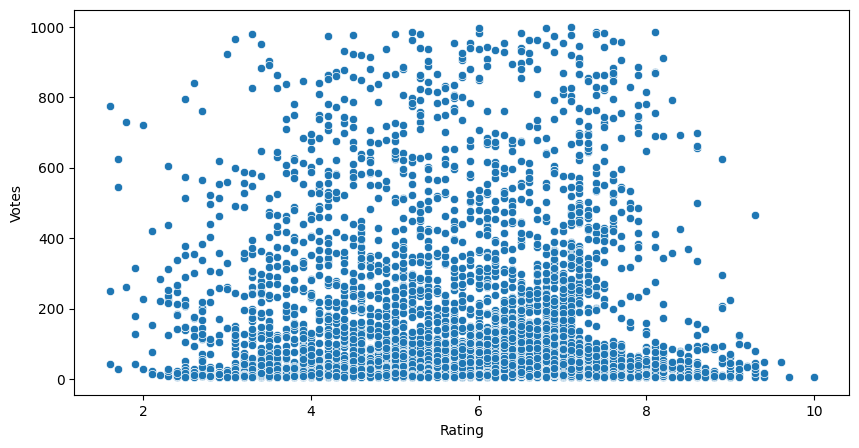

In [43]:
 sns.scatterplot(x='Rating',y='Votes',data=df_m)

In [63]:
df_m['Rating'] = pd.to_numeric(df_m['Rating'], errors='coerce')
def categorized_rating(rating):
  if(rating>8.0):
    return 'Excellent'
  elif(6.0<rating<8.0):
    return 'Good'
  elif(5.0<rating<6.0):
    return 'Average'
  else:
    return 'bad'

In [64]:
df_m['categorized_rating']=df_m['Rating'].apply(categorized_rating)

In [65]:
df_m.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,categorized_rating
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,bad
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,NaN,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,bad
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,bad
3,#Yaaram,(2019),110 min,"Comedy, Romance",NaN,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,bad
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,bad


In [74]:
len(df_m[df_m['Genre'].fillna('').str.contains('Action',case=False)])

3543

In [75]:
df_m[df_m['Genre'].fillna('').str.contains('Action',case=False)]


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,categorized_rating
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",NaN,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,bad
26,13 May Gulaabi Nagar,(2010),NaN,Action,NaN,NaN,N.K. Pareek,Nirmal Pandey,Khushi Rajpoot,Raj Singh Verma,bad
33,16 December,(2002),158 min,"Action, Thriller",NaN,NaN,Mani Shankar,Milind Soman,Danny Denzongpa,Gulshan Grover,bad
34,18.11,(2014),126 min,Action,NaN,10.0,Mohibul Haque,Rehal Khan,Gulshan Grover,Mukesh Tiwari,bad
42,1942: A Love Story,(1994),157 min,"Action, Drama, History",NaN,NaN,Vidhu Vinod Chopra,Anil Kapoor,Jackie Shroff,Manisha Koirala,bad
...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,NaN,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,bad
15505,Zulmi,(1999),129 min,"Action, Drama",NaN,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,bad
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,bad
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,bad


In [77]:
df_m['Genre']

0                  Drama
1                  Drama
2         Drama, Musical
3        Comedy, Romance
4                  Drama
              ...       
15504             Action
15505      Action, Drama
15506             Action
15507             Action
15508      Action, Drama
Name: Genre, Length: 15509, dtype: object

In [79]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                15509 non-null  object 
 1   Year                14981 non-null  object 
 2   Duration            7240 non-null   object 
 3   Genre               13632 non-null  object 
 4   Rating              0 non-null      float64
 5   Votes               6548 non-null   float64
 6   Director            14984 non-null  object 
 7   Actor 1             13892 non-null  object 
 8   Actor 2             13125 non-null  object 
 9   Actor 3             12365 non-null  object 
 10  categorized_rating  15509 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.3+ MB


In [80]:
l=[]
for i in df_m['Genre']:
  if isinstance(i, str):
    l.append(i.split(','))
  else:
    l.append([])

In [81]:
l

[['Drama'],
 ['Drama'],
 ['Drama', ' Musical'],
 ['Comedy', ' Romance'],
 ['Drama'],
 ['Comedy', ' Drama', ' Musical'],
 ['Drama', ' Romance', ' War'],
 ['Documentary'],
 ['Horror', ' Mystery', ' Thriller'],
 ['Action', ' Crime', ' Thriller'],
 ['Drama'],
 ['Horror'],
 ['Horror', ' Romance', ' Thriller'],
 ['Comedy', ' Drama', ' Romance'],
 ['Thriller'],
 ['Comedy', ' Drama'],
 [],
 ['Comedy', ' Drama', ' Fantasy'],
 ['Comedy', ' Drama', ' Romance'],
 [],
 ['Comedy', ' Drama', ' Family'],
 ['Crime', ' Drama', ' Mystery'],
 ['Horror', ' Thriller'],
 ['Biography'],
 ['Documentary'],
 ['Comedy', ' Horror'],
 ['Action'],
 ['Drama'],
 ['Drama', ' Horror', ' Mystery'],
 ['Comedy'],
 ['Drama'],
 [],
 ['Drama'],
 ['Action', ' Thriller'],
 ['Action'],
 ['Drama', ' History'],
 ['Drama'],
 ['Drama', ' History', ' Sport'],
 ['Horror', ' Mystery', ' Romance'],
 ['Horror', ' Mystery'],
 ['Drama', ' Horror', ' Romance'],
 ['Horror', ' Mystery', ' Romance'],
 ['Action', ' Drama', ' History'],
 ['Actio

In [82]:
one_d=[]
for i in l:
  for j in i:
    one_d.append(j)

In [83]:
one_d

['Drama',
 'Drama',
 'Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 'Drama',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Thriller',
 'Comedy',
 ' Drama',
 'Comedy',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Family',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Biography',
 'Documentary',
 'Comedy',
 ' Horror',
 'Action',
 'Drama',
 'Drama',
 ' Horror',
 ' Mystery',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 ' History',
 'Drama',
 'Drama',
 ' History',
 ' Sport',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Comedy',
 'Drama'

In [84]:
uni_list=[]
for i in one_d:
  if i not in uni_list:
    uni_list.append(i)

In [86]:
len(uni_list)

43

In [87]:
one_d=[]
for i in l:
  for j in i:
    one_d.append(j)

In [88]:
one_d

['Drama',
 'Drama',
 'Drama',
 ' Musical',
 'Comedy',
 ' Romance',
 'Drama',
 'Comedy',
 ' Drama',
 ' Musical',
 'Drama',
 ' Romance',
 ' War',
 'Documentary',
 'Horror',
 ' Mystery',
 ' Thriller',
 'Action',
 ' Crime',
 ' Thriller',
 'Drama',
 'Horror',
 'Horror',
 ' Romance',
 ' Thriller',
 'Comedy',
 ' Drama',
 ' Romance',
 'Thriller',
 'Comedy',
 ' Drama',
 'Comedy',
 ' Drama',
 ' Fantasy',
 'Comedy',
 ' Drama',
 ' Romance',
 'Comedy',
 ' Drama',
 ' Family',
 'Crime',
 ' Drama',
 ' Mystery',
 'Horror',
 ' Thriller',
 'Biography',
 'Documentary',
 'Comedy',
 ' Horror',
 'Action',
 'Drama',
 'Drama',
 ' Horror',
 ' Mystery',
 'Comedy',
 'Drama',
 'Drama',
 'Action',
 ' Thriller',
 'Action',
 'Drama',
 ' History',
 'Drama',
 'Drama',
 ' History',
 ' Sport',
 'Horror',
 ' Mystery',
 ' Romance',
 'Horror',
 ' Mystery',
 'Drama',
 ' Horror',
 ' Romance',
 'Horror',
 ' Mystery',
 ' Romance',
 'Action',
 ' Drama',
 ' History',
 'Action',
 ' Drama',
 ' War',
 'Thriller',
 'Comedy',
 'Drama'

In [90]:
from collections import Counter

In [92]:
Counter(one_d)

Counter({'Drama': 4517,
         ' Musical': 424,
         'Comedy': 1561,
         ' Romance': 1687,
         ' Drama': 2726,
         ' War': 39,
         'Documentary': 383,
         'Horror': 403,
         ' Mystery': 365,
         ' Thriller': 927,
         'Action': 3487,
         ' Crime': 863,
         'Thriller': 786,
         ' Fantasy': 266,
         ' Family': 782,
         'Crime': 459,
         'Biography': 155,
         ' Horror': 121,
         ' History': 178,
         ' Sport': 59,
         'Adventure': 252,
         ' Sci-Fi': 48,
         'War': 8,
         'Sport': 11,
         ' Comedy': 468,
         ' Adventure': 289,
         ' Biography': 53,
         'Mystery': 148,
         'Musical': 165,
         ' Music': 74,
         'Romance': 762,
         'Family': 161,
         'Fantasy': 192,
         'Sci-Fi': 10,
         'Animation': 125,
         'Music': 16,
         'History': 29,
         ' Action': 56,
         ' News': 9,
         ' Western': 5,
         ' R